<a href="https://colab.research.google.com/github/SundariReddy/CE888-1/blob/master/exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target.copy()
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#How many samples and features are there?

# YOUR CODE HERE
print('number of samples: ' + str(df.shape[0]) + ' // number of features: ' + str(len(df.columns)-1))

number of samples: 178 // number of features: 13


In [4]:
# Quiz Q1
# How many instances are there for each class? 
df['y'].value_counts()


1    71
0    59
2    48
Name: y, dtype: int64

In [5]:
# Calculate the means, medians, and standard deviations of each feature
features_df = df.loc[:, df. columns != 'y']
statistics_df = pd.DataFrame(np.vstack((np.mean(df, axis=0), np.median(df, axis=0), np.std(df, axis=0))), columns=df.columns, index=['mean','median','std'])
statistics_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
median,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
std,0.809543,1.114004,0.273572,3.330170,14.242308,0.624091,0.996049,0.124103,0.570749,2.311765,0.227929,0.707993,314.021657,0.772855


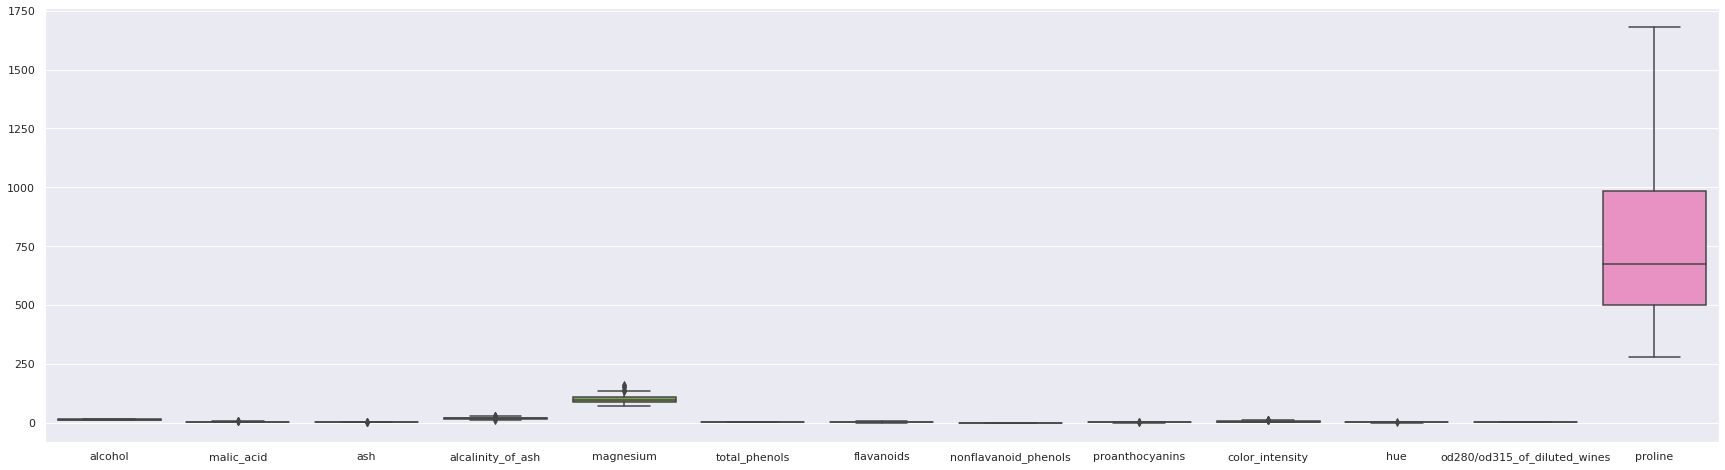

In [6]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

sns.set(rc={'figure.figsize':(30,8)})
sns.boxplot(data=features_df)

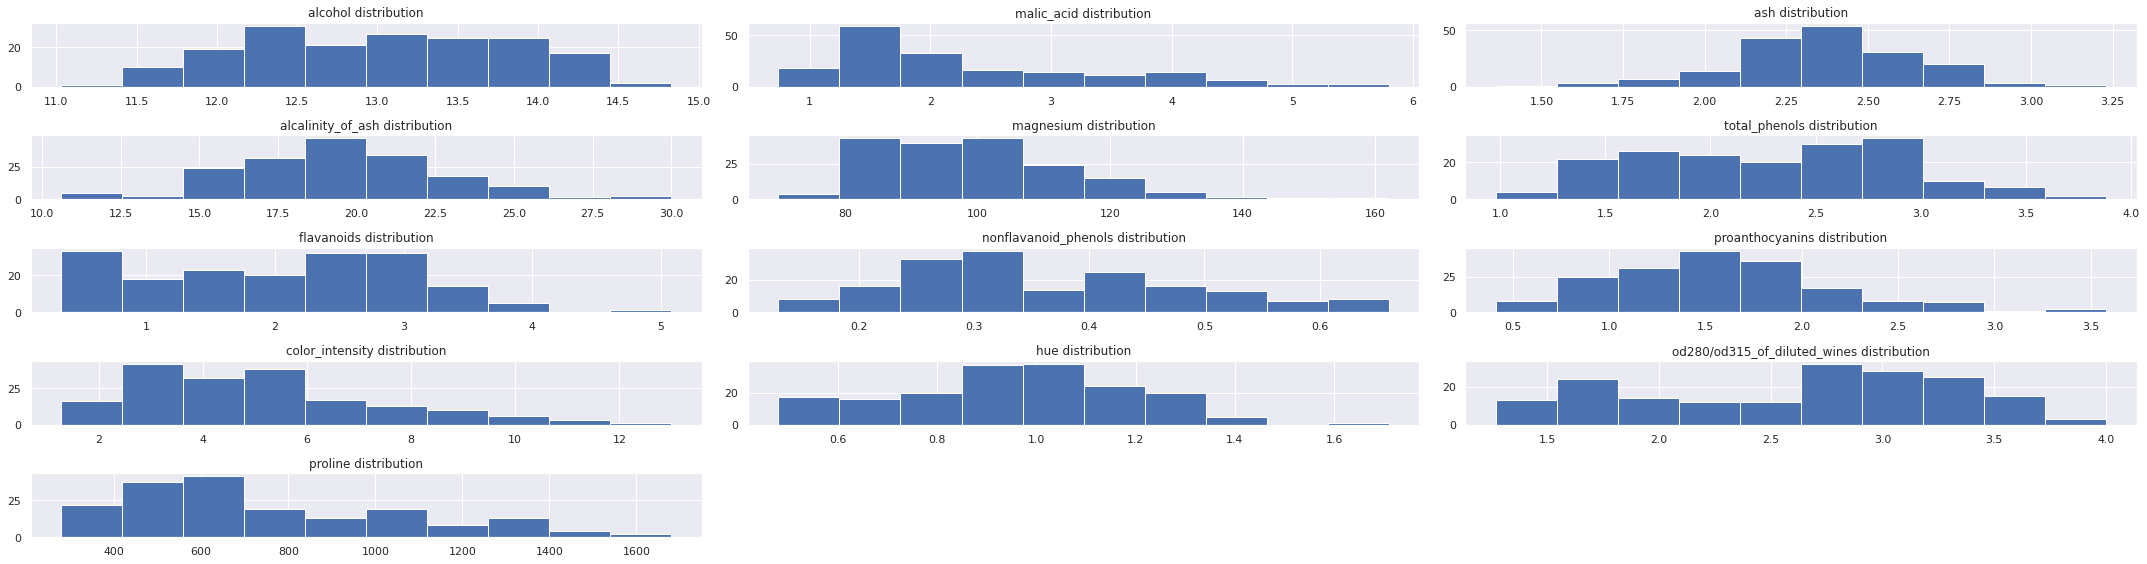

In [7]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

grid = plt.figure()
for i, feature in enumerate(features_df.columns):
  position = grid.add_subplot(5, 3, i+1)
  features_df[feature].hist(bins=10,ax=position)
  position.set_title(feature + " distribution")
grid.tight_layout()
plt.show()

Let's do some multivariate analysis

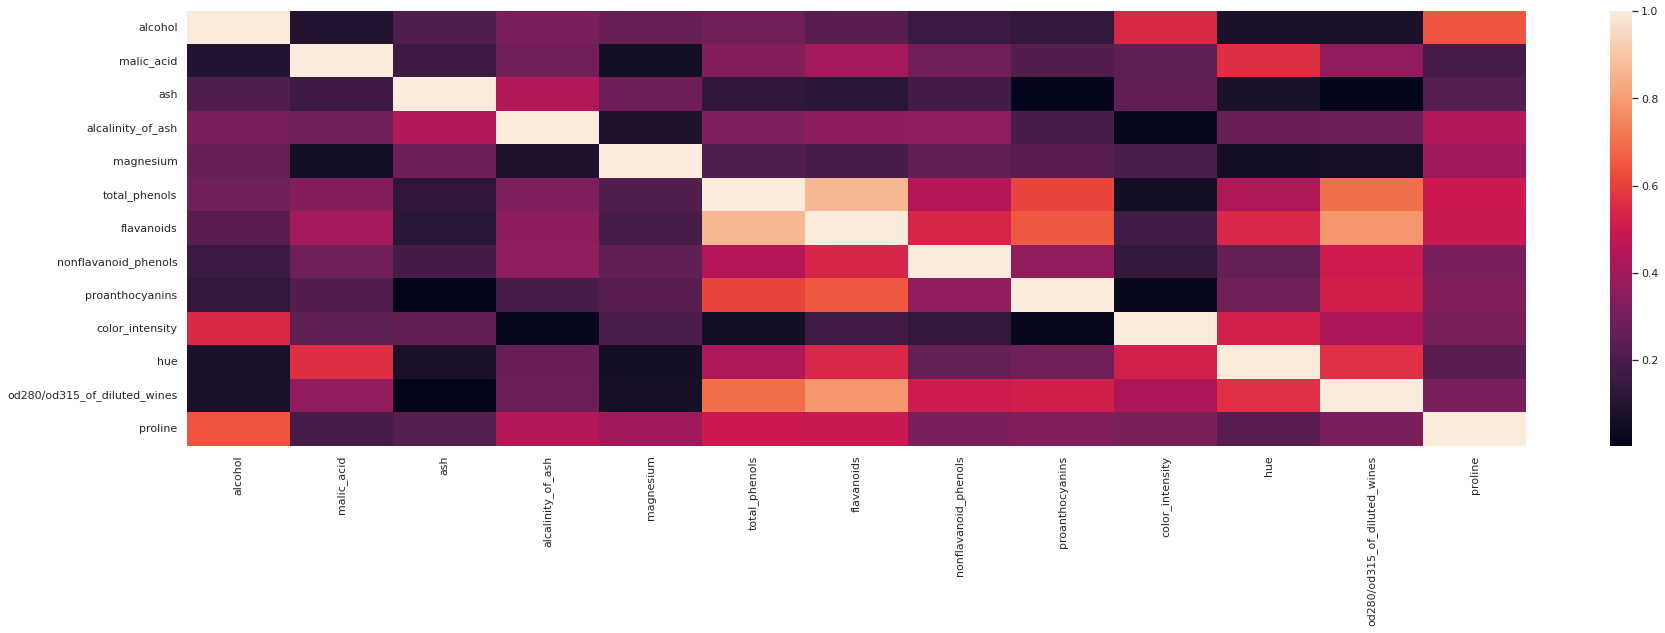

In [9]:
# Calculate the correlations between each pair of variables

corr = features_df.corr().abs()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

sns.heatmap(corr)

In [10]:
# What is the highest correlation between features?

print(corr['flavanoids']['total_phenols'])

0.8645635000951147


In [19]:
def column_average(df, column):
    return df[column].mean()

def correlation(df, column1, column2):
    return df[column1].corr(df[column2]) 

def std_pca(df, var=0.5): # define inputs: dataframe and variance
    y_flag = False
    if 'y' in df:
      y = df['y']
      df = df.loc[:, df. columns != 'y']
      y_flag = True
    standard_transformer = StandardScaler()
    df = standard_transformer.fit_transform(df)
    pca = PCA(n_components=var, random_state=100)
    x_pca = pca.fit_transform(df)
    if y_flag:
      x_pca = np.column_stack((x_pca, y))
    return x_pca, pca

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [12]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

pca_df, pca = std_pca(features_df, var=2)
pca.explained_variance_ratio_.cumsum()


array([0.36198848, 0.55406338])

In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [13]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

pca_df, pca = std_pca(features_df, var=0.85)

pca.explained_variance_ratio_


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [15]:
# How much variance is retained if we do PCA with 3 components? (Q7)

pca_df, pca = std_pca(features_df, var=3)
pca.explained_variance_ratio_.cumsum()


array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



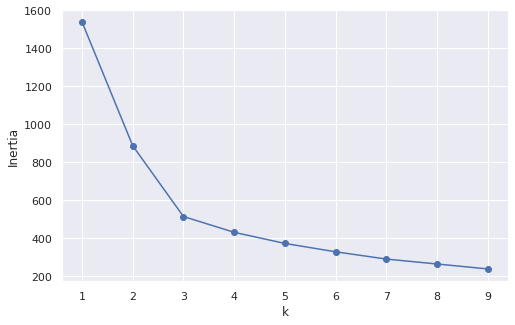

In [16]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

pca_df, pca = std_pca(features_df, var=3)
k_options = range(1,10)
inertias = []

for k in k_options:
    kmeans_clf = KMeans(n_clusters=k)
    kmeans_clf.fit(pca_df)
    inertias.append(kmeans_clf.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


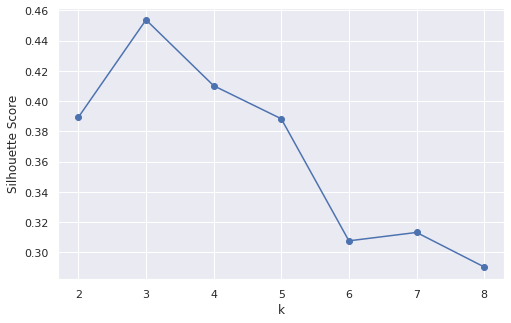

In [17]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

sil = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(pca_df)
    sil.append(silhouette_score(pca_df, y_pred))
# Let's plot SIL vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!